<a href="https://colab.research.google.com/github/mahendra204/Machine-Learning/blob/main/Machine_Learning_Revision_from_abhishek_tahkur_text_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [3]:
data = datasets.fetch_openml(
 'mnist_784',
 version=1,
 return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
pixel_values

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
targets

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

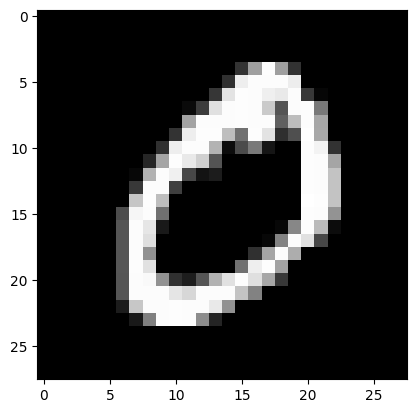

In [8]:
pixel_values = np.array(pixel_values)
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [9]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [10]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

<ipython-input-10-3160f3d211f6>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)


In [13]:
tsne_df

,x,y,targets
0,20.515184,-11.026083,5
1,57.560905,0.121864,0
2,-0.679077,-54.268143,4
3,-41.528664,11.559952,1
4,-10.032307,-33.632420,9
...,...,...,...
2995,-35.470184,-24.492340,7
2996,52.467827,-3.201818,0
2997,-30.010117,-13.070750,9
2998,-29.661884,45.717960,1


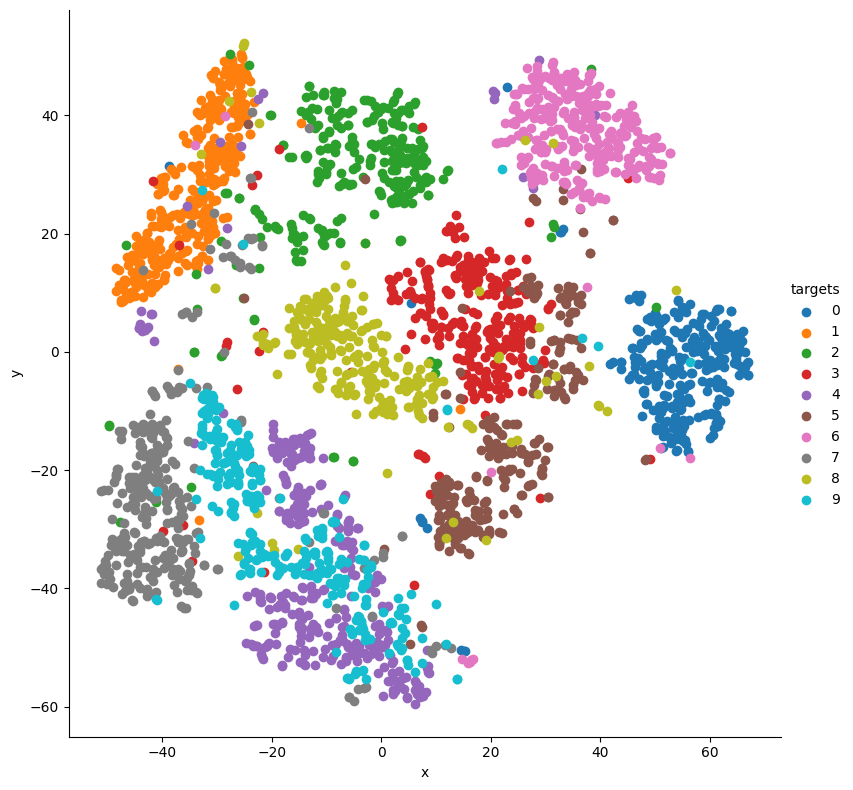

In [15]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()

Cross-Validation

Cross-validation is a step in the process of building a machine learning model which
helps us ensure that our models fit the data accurately and also ensures that we do
not overfit. But this leads to another term: overfitting.




In [24]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')

df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [25]:
quality_mapping = {
 3: 0,
 4: 1,
 5: 2,
 6: 3,
 7: 4,
 8: 5
}

In [26]:
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [28]:
df_train=df.head(3000)
df_test=df.tail(1898)

In [29]:
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,3.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,3.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,3.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,3.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,6.6,0.28,0.34,0.8,0.037,42.0,119.0,0.98880,3.03,0.37,12.5,3.0
2996,6.5,0.35,0.36,0.8,0.034,32.0,111.0,0.98942,3.11,0.50,12.1,5.0
2997,6.9,0.25,0.33,1.2,0.035,35.0,158.0,0.99082,3.02,0.58,11.3,3.0
2998,6.0,0.32,0.30,1.3,0.025,18.0,112.0,0.98802,3.07,0.64,13.3,4.0


In [30]:
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3000,6.7,0.18,0.28,10.2,0.039,29.0,115.0,0.99469,3.11,0.45,10.9,4.0
3001,6.6,0.20,0.27,10.9,0.038,29.0,130.0,0.99496,3.11,0.44,10.5,4.0
3002,6.3,0.37,0.28,6.3,0.034,45.0,152.0,0.99210,3.29,0.46,11.6,4.0
3003,7.2,0.19,0.31,6.3,0.034,17.0,103.0,0.99305,3.15,0.52,11.4,4.0
3004,6.3,0.18,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,3.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,2.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,3.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,4.0


In [60]:
from sklearn import tree
from sklearn import metrics
df_train = df_train.dropna(subset=['quality'])

clf = tree.DecisionTreeClassifier(max_depth=7)
cols=['fixed acidity', 'volatile acidity', 'citric acid','residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [61]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(
 df_train.quality, train_predictions
)
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
 df_test.quality, test_predictions
)

In [62]:
train_accuracy

0.6156928213689482

In [63]:
test_accuracy

0.5079030558482613

In [65]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [89]:
train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,9):
  clf=tree.DecisionTreeClassifier(max_depth=depth)
  cols=['fixed acidity', 'volatile acidity', 'citric acid','residual sugar',
 'chlorides','free sulfur dioxide','total sulfur dioxide', 'density','pH',
 'sulphates', 'alcohol']
  clf.fit(df_train[cols],df_train.quality)
  train_predictions = clf.predict(df_train[cols])
  test_predictions = clf.predict(df_test[cols])
  train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
  test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

In [90]:
train_accuracies

[0.5,
 0.41736227045075125,
 0.4958263772954925,
 0.5225375626043406,
 0.5465776293823038,
 0.5736227045075125,
 0.5886477462437396,
 0.6156928213689482,
 0.6614357262103506]

In [91]:
test_accuracies

[0.5,
 0.4994731296101159,
 0.5326659641728135,
 0.5173867228661749,
 0.5142255005268704,
 0.5126448893572181,
 0.5079030558482613,
 0.5084299262381454,
 0.4678609062170706]

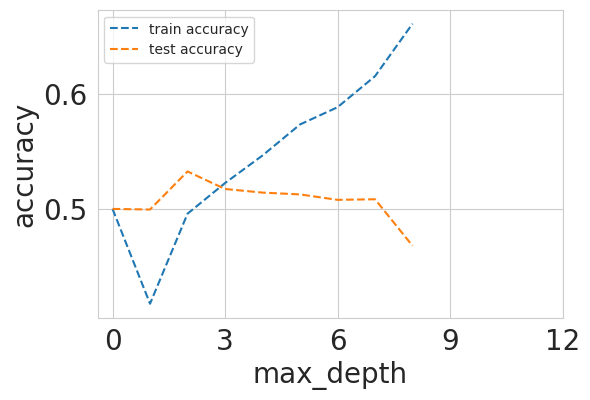

In [108]:
plt.figure(figsize=(6, 4))
# sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy", linestyle='dashed')
plt.plot(test_accuracies, label="test accuracy", linestyle='dashed')
plt.legend(loc="upper left", prop={'size': 10})
plt.xticks(range(0, 15, 3))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

<ipython-input-112-5195bddc15aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.countplot(x='quality', data=df_train,palette=colors)
<ipython-input-112-5195bddc15aa>:2: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  b = sns.countplot(x='quality', data=df_train,palette=colors)


Text(0, 0.5, 'count')

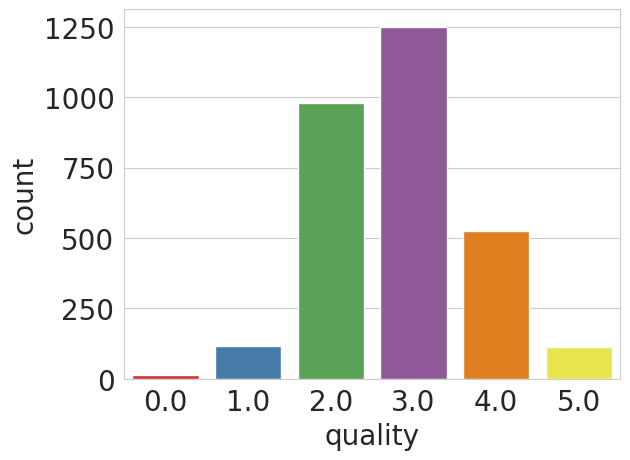

In [112]:

colors = sns.color_palette("Set1")
b = sns.countplot(x='quality', data=df_train,palette=colors)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)


If we talk about classification problems, the most common metrics used are:
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply
AUC (AUC)
- Log loss
- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)


When it comes to regression, the most commonly used evaluation metrics are:
- Mean absolute error (MAE)
- Mean squared error (MSE)
- Root mean squared error (RMSE)
- Root mean squared logarithmic error (RMSLE)
- Mean percentage error (MPE)
- Mean absolute percentage error (MAPE)
- R2

200 images--> 100 and 100 ----> 50 and 50  then accuracy

In [114]:
def accuracy(y_true, y_pred):
 # initialize a simple counter for correct predictions
 correct_counter = 0
 # loop over all elements of y_true
 # and y_pred "together"
 for yt, yp in zip(y_true, y_pred):
  if yt == yp:
 # if prediction is equal to truth, increase the counter
    correct_counter += 1
 # return accuracy
 # which is correct predictions over the number of samples
 return correct_counter / len(y_true)

In [115]:
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)

0.625

when data is skewed we can't use accuracy.
in this case we use **precision.**

```
# This is formatted as code
```



Before learning about precision, we need to know a few terms. Here we have
assumed that chest x-ray images with pneumothorax are positive class (1) and
without pneumothorax are negative class (0).


True positive (TP): Given an image, if your model predicts the image has
pneumothorax, and the actual target for that image has pneumothorax, it is
considered a true positive.

True negative (TN): Given an image, if your model predicts that the image does not
have pneumothorax and the actual target says that it is a non-pneumothorax image,
it is considered a true negative.
In simple words, if your model correctly predicts positive class, it is true positive,
and if your model accurately predicts negative class, it is a true negative.

False positive (FP): Given an image, if your model predicts pneumothorax and the
actual target for that image is non- pneumothorax, it a false positive.

False negative (FN): Given an image, if your model predicts non-pneumothorax
and the actual target for that image is pneumothorax, it is a false negative.
In simple words, if your model incorrectly (or falsely) predicts positive class, it is
a false positive. If your model incorrectly (or falsely) predicts negative class, it is a
false negative


In [117]:
def true_positive(y_true, y_pred):
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1:
      tp += 1
  return tp
def true_negative(y_true, y_pred):
 # initialize
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 0:
      tn += 1
  return tn
def false_positive(y_true, y_pred):
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 1:
      fp += 1
  return fp
def false_negative(y_true, y_pred):
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 0:
      fn += 1
  return fn

In [128]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
true_positive(l1, l2)


2

In [129]:
false_positive(l1, l2)


1

In [130]:
false_negative(l1, l2)


2

In [131]:
true_negative(l1, l2)


3

In [132]:
def accuracy_v2(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  accuracy_score = (tp + tn) / (tp + tn + fp + fn)
  return accuracy_score

In [133]:
accuracy_v2(l1,l2)

0.625

In [136]:
def precision(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  precision = tp / (tp + fp)
  return precision

In [138]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

precision(l1, l2)

0.6666666666666666

In [141]:
def recall(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  recall = tp / (tp + fn)
  return recall

In [142]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

recall(l1, l2)

0.5

In [144]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491, 0.17554844,0.15952202, 0.03819563, 0.11639273,0.079377,0.08584789, 0.39095342,0.2759048, 0.03447096, 0.04644807,0.03543574, 0.18521942, 0.05934905,
0.61977213, 0.33056815]

In [145]:
precisions = []
recalls = []
thresholds = [0.0490937 , 0.05934905, 0.079377,
 0.08584789, 0.11114267, 0.11639273,
 0.15952202, 0.17554844, 0.18521942,
 0.27259048, 0.31620708, 0.33056815,
 0.39095342, 0.61977213]

In [146]:
for i in thresholds:
  temp_prediction = [1 if x >= i else 0 for x in y_pred]
  p = precision(y_true, temp_prediction)
  r = recall(y_true, temp_prediction)
  precisions.append(p)
  recalls.append(r)

In [147]:
precisions

[0.21428571428571427,
 0.15384615384615385,
 0.16666666666666666,
 0.18181818181818182,
 0.1,
 0.1111111111111111,
 0.125,
 0.14285714285714285,
 0.16666666666666666,
 0.2,
 0.25,
 0.3333333333333333,
 0.5,
 1.0]

In [148]:
recalls

[1.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333]

Text(0, 0.5, 'Precision')

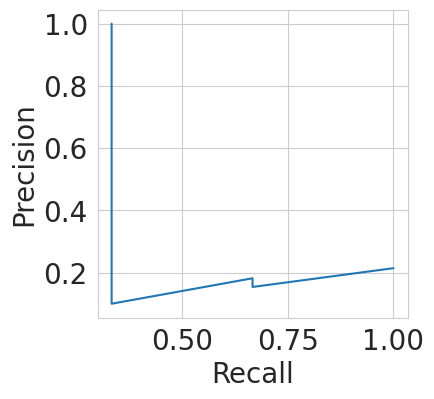

In [151]:
plt.figure(figsize=(4,4))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=20)
plt.ylabel('Precision', fontsize=20)

F1 score is a metric that combines both precision and recall. It is defined as a simple weighted average (harmonic mean) of precision and recall. If we denote precision

using P and recall using R, we can represent the F1 score as:
F1 = 2PR / (P + R)

A little bit of mathematics will lead you to the following equation of F1 based on TP, FP and FN.


F1 = 2TP / (2TP + FP + FN)

In [152]:
def f1(y_true, y_pred):
  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)
  score = 2 * p * r / (p + r)
  return score

In [153]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
f1(y_true, y_pred)

0.5714285714285715

In [154]:
metrics.f1_score(y_true,y_pred)

0.5714285714285715

Instead of looking at precision and recall individually, you can also just look at F1
score. Same as for precision, recall and accuracy, F1 score also ranges from 0 to 1,
and a perfect prediction model has an F1 of 1.
. When dealing with datasets that have
skewed targets, we should look at F1 (or precision and recall) instead of accuracy.

Then there are other crucial terms that we should know about.

The first one is TPR or True Positive Rate, which is the same as recall.
TPR = TP / (TP + FN)

Even though it is same as recall, we will make a python function for it for further use with this name.

In [155]:
def tpr(y_true, y_pred):
  return recall(y_true, y_pred)
# TPR or recall is also known as sensitivity.

In [156]:
# And FPR or False Positive Rate, which is defined as:
# FPR = FP / (TN + FP)
def fpr(y_true, y_pred):
  fp = false_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  return fp / (tn + fp)
# And 1 - FPR is known as specificity or True Negative Rate or TNR.

In [158]:
tpr_list = []
fpr_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
 # calculate predictions for a given threshold
  temp_pred = [1 if x >= thresh else 0 for x in y_pred]
 # calculate tpr
  temp_tpr = tpr(y_true, temp_pred)
 # calculate fpr
  temp_fpr = fpr(y_true, temp_pred)
 # append tpr and fpr to lists
  tpr_list.append(temp_tpr)
  fpr_list.append(temp_fpr)

In [160]:
df=pd.DataFrame({'threshold':thresholds,
             'tpr':tpr_list,
             'fpr':fpr_list})
df

,threshold,tpr,fpr
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


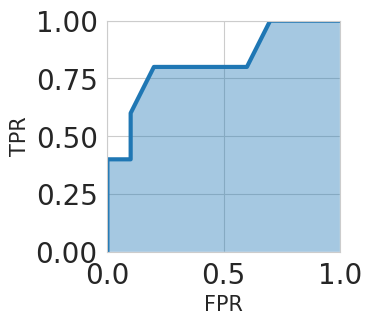

In [162]:
plt.figure(figsize=(3,3))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

This curve is also known as the Receiver Operating Characteristic (ROC). And
if we calculate the area under this ROC curve, we are calculating another metric
which is used very often when you have a dataset which has skewed binary targets.

This metric is known as the Area Under ROC Curve or Area Under Curve or
just simply AUC. There are many ways to calculate the area under the ROC curve.
For this particular purpose, we will stick to the fantastic implementation by scikitlearn.

In [164]:
y_true = [0, 0, 0, 0, 1, 0, 1,0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,0.85, 0.15, 0.99]
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

- AUC = 1 implies you have a perfect model. Most of the time, it means that
you made some mistake with validation and should revisit data processing
and validation pipeline of yours. If you didn’t make any mistakes, then
congratulations, you have the best model one can have for the dataset you
built it on.
- AUC = 0 implies that your model is very bad (or very good!). Try inverting
the probabilities for the predictions, for example, if your probability for the
positive class is p, try substituting it with 1-p. This kind of AUC may also
mean that there is some problem with your validation or data processing.
- AUC = 0.5 implies that your predictions are random. So, for any binary
classification problem, if I predict all targets as 0.5, I will get an AUC of
0.5.

AUC values between 0 and 0.5 imply that your model is worse than random. Most
of the time, it’s because you inverted the classes. If you try to invert your
predictions, your AUC might become more than 0.5. AUC values closer to 1 are
considered good.

But what does AUC say about our model?
Suppose you get an AUC of 0.85 when you build a model to detect pneumothorax
from chest x-ray images. This means that if you select a random image from your
dataset with pneumothorax (positive sample) and another random image without
pneumothorax (negative sample), then the pneumothorax image will rank higher
than a non-pneumothorax image with a probability of 0.85.


AUC is a widely used metric for skewed binary classification tasks in the industry,
and a metric everyone should know about. Once you understand the idea behind
AUC, as explained in the paragraphs above, it is also easy to explain it to nontechnical people who would probably be assessing your models in the industry.
Another important metric you should learn after learning AUC is log loss. In case
of a binary classification problem, we define log loss as:

Log Loss = - 1.0 * ( target * log(prediction) + (1 - target) * log(1 - prediction) )

**Confusion matrix** gives an easy way to calculate different metrics that we have
discussed before.
Scikit-learn offers an easy and straightforward way to generate a
confusion matrix. Please note that the confusion matrix that I have shown in figure
8 is a transpose of scikit-learn’s confusion matrix and an original version can be
plotted by the following code.

Text(0.5, 55.249999999999986, 'Predicted Labels')

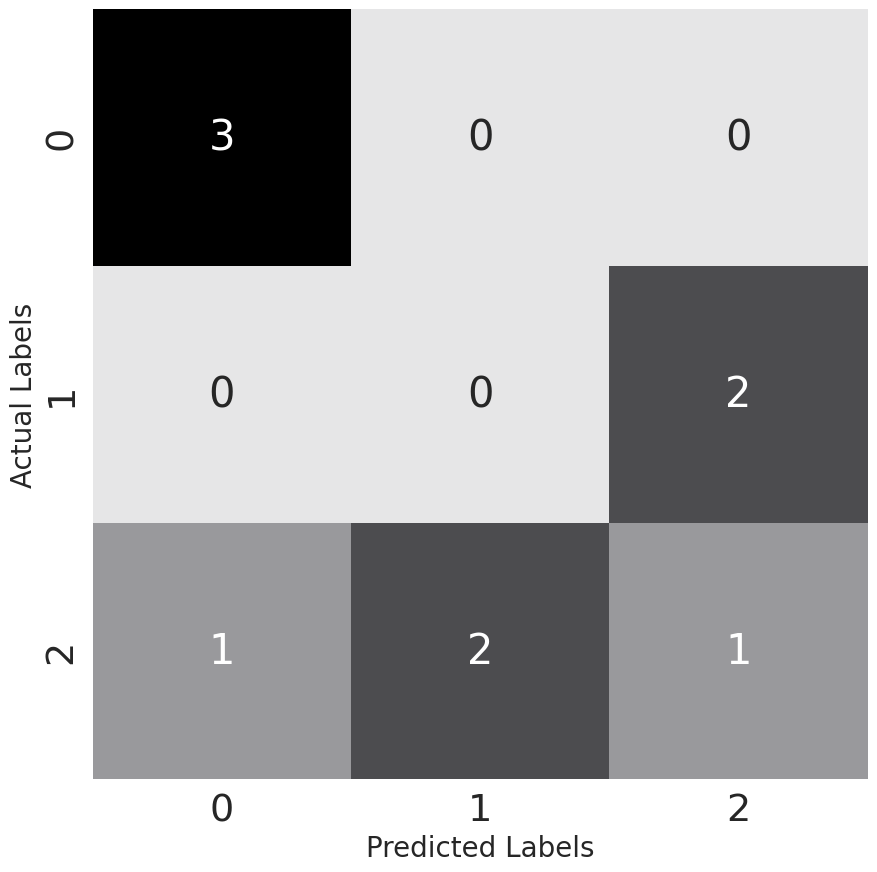

In [165]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)
# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0,
as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)